# Model Validation

In [1]:
import warnings
warnings.filterwarnings('ignore')

# I. Model Capacity

  * import Packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
  * 'Electric.csv' From github

In [3]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [4]:
Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,155.5
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,155.5
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,155.5
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,155.5
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,208.4


* 산점도(surface_area vs. electricity)

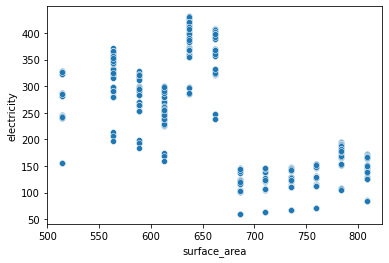

In [6]:
sns.scatterplot(Elec['surface_area'], Elec['electricity'])
plt.show()

# 1) 1차 모델 시각화

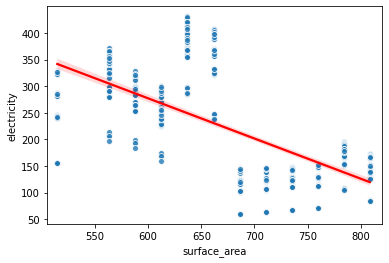

In [10]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'red'},
            scatter_kws = {'edgecolor' : 'white'})
plt.xlim(505, 820)
plt.show()

# 2) 2차 모델 시각화

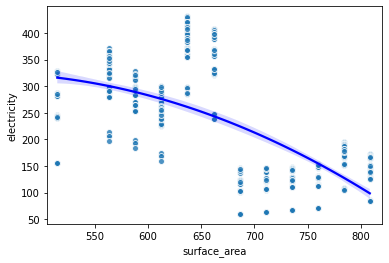

In [12]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'blue'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 2)
plt.xlim(505, 820)
plt.show()

# 3) 5차 모델 시각화

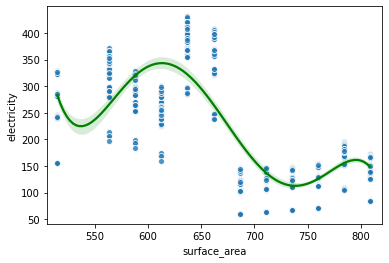

In [15]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
                line_kws = {'color' : 'green'},
                scatter_kws = {'edgecolor' : 'white'},
                order = 5)
plt.xlim(505, 820)
plt.show()

# 4) 9차 모델 시각화

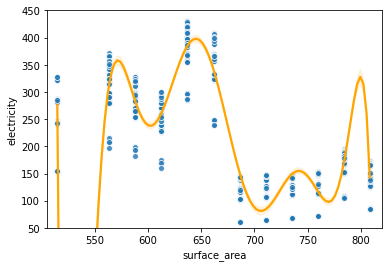

In [17]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'orange'},
            scatter_kws = {'edgecolor' : 'white'},
            order = 9)

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.show()

# 5) 4개 모델 비교 시각화

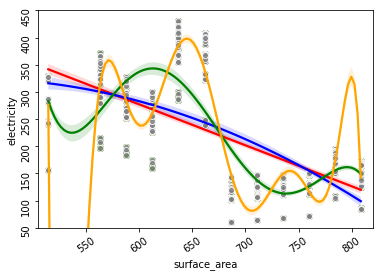

In [20]:
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'red'})
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'blue'}, order = 2)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'green'}, order = 5)
sns.regplot(x = 'surface_area', y = 'electricity', data = Elec,
            line_kws = {'color' : 'orange'}, scatter_kws = {'color' : 'gray', 'edgecolor':'white'}, order = 9)

plt.xlim(505, 820)
plt.ylim(50, 450)
plt.xticks(rotation = 35)
plt.yticks(rotation = 90)
plt.show()

# II. Training Error

   * import Packages

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
  * 'Electric.csv' From github

In [23]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'

Elec = pd.read_csv(url)

Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# 1) 1차 모델 Training Error
   * X_train and y_train

In [24]:
X_train = Elec[['surface_area']]
y_train = Elec[['electricity']]

X_train.shape, y_train.shape

((768, 1), (768, 1))

* 모델 생성


In [27]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X_train, y_train) # 학습시킴

LinearRegression()

* 모델 정보(학습결과) 확인

In [30]:
print(Model_1.coef_)  # 기울기
print(Model_1.intercept_) # 절편

[[-0.75387157]]
[729.4538243]


* y_hat(예측값)생성

In [32]:
y_hat_1 = Model_1.predict(X_train)  # predict = 예측값

len(y_hat_1)

768

* MSE(Mean Squared Error) 계산

In [33]:
TR_Err_1 = np.mean((y_train - y_hat_1) ** 2)
TR_Err_1

electricity    5763.983779
dtype: float64

# 2) 5차 모델 Training Error

* X 다항차수 변환
  *  (768, 1) to (768, 5)

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5, include_bias = False) # 차수 degree
PX_5 = poly.fit_transform(X_train)  # 학습 데이터에 맞춘다음 변환

In [40]:
PX_5

array([[5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       [5.14500000e+02, 2.64710250e+05, 1.36193424e+08, 7.00715165e+10,
        3.60517952e+13],
       ...,
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14],
       [8.08500000e+02, 6.53672250e+05, 5.28494014e+08, 4.27287410e+11,
        3.45461871e+14]])

In [41]:
X_train.shape, y_train.shape

((768, 1), (768, 1))

* 5차 모델 생성

In [50]:
from sklearn.linear_model import LinearRegression
Model_5 = LinearRegression()  # 모델생성
Model_5.fit(PX_5, y_train) # X, y 값 학습

LinearRegression()

* 모델 정보(학습결과) 확인

In [51]:
np.set_printoptions(suppress = True, precision = 40)

print(Model_5.coef_)
print(Model_5.intercept_)

[[-0.00031551482066185534       -0.1029296835336089
   0.00037876155771186435       -0.0000005032064365372355
   0.00000000022980592429000524]]
[2906.2216253808647]


* y_hat(예측값) 생성

In [55]:
PX_5_pred = poly.fit_transform(X_train)

y_hat_5 = Model_5.predict(PX_5_pred)

y_hat_5.shape

(768, 1)

* MSE(mean Squared Error) 계산

In [56]:
TR_Err_5 = np.mean((y_train - y_hat_5) ** 2)
TR_Err_5

electricity    4177.726329
dtype: float64

# 3) 9차 모델 Training Error
* X 다항차수 변환
  * (768, 1) to (768, 9)

In [57]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9 = poly.fit_transform(X_train)

In [58]:
X_train.shape, PX_9.shape

((768, 1), (768, 9))

* 모델 생성

In [60]:
from sklearn.linear_model import LinearRegression

Model_9 = LinearRegression()
Model_9.fit(PX_9, y_train)

LinearRegression()

* 모델 정보(학습결과) 확인

In [61]:
print(Model_9.coef_)
print(Model_9.intercept_)

[[ 0.0000000000000000000000000479174184634688
   0.0000000000000000040128728976712735
   0.000000000000000000019806870398781567
   0.000000000000000009606888487135083
   0.0000000000000031773264060317083
   0.0000000000006336691113703143
  -0.0000000000000022880589639802964
   0.000000000000000002775149473685744
  -0.0000000000000000000011271003952673454   ]]
[-440.08258373868114]


y_hat(예측값) 생성

In [63]:
PX_9_pred = poly.fit_transform(X_train)

y_hat_9 = Model_9.predict(PX_9_pred)

y_hat_9.shape

(768, 1)

* MSE(Mean Squared Error) 계산

In [64]:
TR_Err_9 = np.mean((y_train - y_hat_9) ** 2)
TR_Err_9

electricity    4086.719991
dtype: float64

# 4) 3개 모델 Training Error 비교

In [65]:
print('1차 모델 : ', TR_Err_1)
print('5차 모델 : ', TR_Err_5)
print('9차 모델 : ', TR_Err_9)

1차 모델 :  electricity    5763.983779
dtype: float64
5차 모델 :  electricity    4177.726329
dtype: float64
9차 모델 :  electricity    4086.719991
dtype: float64


# III. Testing Error
   * import Packages

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* pandas DataFrame
   * 'Electric.csv' From github

In [67]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.shape

(768, 9)

# Train_Data vs. Test_Data

#   (1) DataFrame Split
   * 8:2 Split(614:154)
   * 80% Train_DF & 20% Test_DF

In [68]:
from sklearn.model_selection import train_test_split
TR_Elec, TE_Elec = train_test_split(Elec,
                                    test_size = 0.2,
                                    random_state = 2045)

In [69]:
TR_Elec.shape, TE_Elec.shape

((614, 9), (154, 9))

* 80% TR_Elec DataFrame

In [70]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


* 20% TE_Elec DataFrame

In [71]:
TR_Elec.head()

,compactness,surface_area,wall_area,roof_area,height,orientation,glazing_area,glazing_area_distribution,electricity
555,0.74,686.0,245.0,220.5,3.5,5,0.40,1,145.5
355,0.79,637.0,343.0,147.0,7.0,5,0.25,2,389.8
200,0.86,588.0,294.0,147.0,7.0,2,0.10,4,264.4
669,0.62,808.5,367.5,220.5,3.5,3,0.40,3,163.5
561,0.69,735.0,294.0,220.5,3.5,3,0.40,1,147.0


# (2) Array Split
  * X_train(614, 1), X_test(614,) & y_train(154, 1), y_test(154,)

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Elec[['surface_area']],
                                                    Elec[['electricity']],
                                                    test_size = 0.2,
                                                    random_state= 2045) 

In [73]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 1), (154, 1), (614, 1), (154, 1))

* 80% X_train Array

In [74]:
X_train.head()

,surface_area
555,686.0
355,637.0
200,588.0
669,808.5
561,735.0


* 80% y_train Array

In [75]:
y_train.head()

,electricity
555,145.5
355,389.8
200,264.4
669,163.5
561,147.0


# (3) Distribution Visualization

   * Train Data

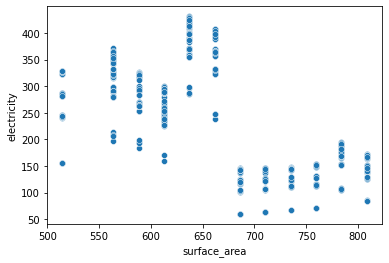

In [76]:
sns.scatterplot(TR_Elec['surface_area'], TR_Elec['electricity'])
plt.show()

* Test Data

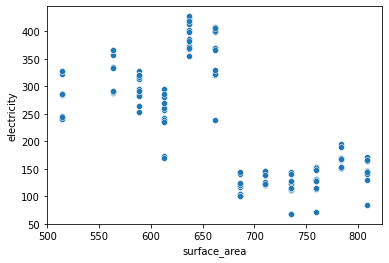

In [77]:
sns.scatterplot(TE_Elec['surface_area'], TE_Elec['electricity'])
plt.show()

# 1) 1차 모델 Testing Error
  * Train_Data로 모델 생성

In [81]:
from sklearn.linear_model import LinearRegression

Model_1 = LinearRegression()
Model_1.fit(X = X_train, y = y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [82]:
y_hat_1 = Model_1.predict(X_test)

y_hat_1.shape

(154, 1)

* Test_Data로 MSE(Mean Squared Error) 계산

In [83]:
from  sklearn.metrics import mean_squared_error

TE_Err_1 = mean_squared_error(y_test, y_hat_1)
TE_Err_1

6044.176547629271

# 2) 5차 모델 Testing Error

* Train_Data로 모델 생성

In [84]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias = False)
PX_5_TR = poly.fit_transform(X_train)

* Test_Data로 y_hat(예측값) 생성

In [85]:
PX_5_TE = poly.fit_transform(X_test)

y_hat_5 = Model_5.predict(PX_5_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [89]:
from sklearn.metrics import mean_squared_error
TE_Err_5 = mean_squared_error(y_test, y_hat_5)
TE_Err_5

4322.857426128008

# 3) 9차 모델 Testing Error

* Train_Data로 모델 생성

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [101]:
from sklearn.linear_model import LinearRegression
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

* Test_Data로 y_hat(예측값) 생성

In [102]:
PX_9_TE = poly.fit_transform(X_test)
y_hat_9 = Model_9.predict(PX_9_TE)

* Test_Data로 MSE(Mean Squared Error) 계산

In [103]:
from sklearn.metrics import mean_squared_error

TE_Err_9 = mean_squared_error(y_test, y_hat_9)
TE_Err_9

4238.6890671375695

# 4) 3개 모델 Testing Error 비교

In [104]:
print('1차 모델 : ', TE_Err_1)
print('5차 모델 : ', TE_Err_5)
print('9차 모델 : ', TE_Err_9)

1차 모델 :  6044.176547629271
5차 모델 :  4322.857426128008
9차 모델 :  4238.6890671375695


# IV. Validation Approach
   * import Packages

In [105]:
import pandas as pd

* pandas DataFrame

In [106]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Electric.csv'
Elec = pd.read_csv(url)
Elec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   compactness                768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   height                     768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   electricity                768 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


# Train vs. Validation vs. Test
  * 6:2:2 Split(462:153:153)

# sklearn Package 사용
   * train_test_split( )

* 20% Test_Data(153)

In [109]:
from sklearn.model_selection import train_test_split

X_remain, X_test, y_remain, y_test = train_test_split(Elec[['surface_area']],
                                                      Elec[['electricity']],
                                                      test_size = int(len(Elec)*0.2),
                                                      random_state=2045)

print(X_remain.shape, y_remain.shape)
print(X_test.shape, y_test.shape)

(615, 1) (615, 1)
(153, 1) (153, 1)


* 60% Train_Data(462) & 20% Validation_Data(153)

In [110]:
X_train, X_valid, y_train, y_valid = train_test_split(X_remain, y_remain,
                                                      test_size = int(len(Elec) * 0.2),
                                                      random_state = 2045)
print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)
print(X_test.shape, y_test.shape)

(462, 1) (462, 1)
(153, 1) (153, 1)
(153, 1) (153, 1)


# 1) 5차 모델 Validation Error

 * Train_Data로 모델 생성

In [111]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 5, include_bias=False)
PX_5_TR = poly.fit_transform(X_train)

In [113]:
from sklearn.linear_model import LinearRegression

Model_5 = LinearRegression()
Model_5.fit(PX_5_TR, y_train)

LinearRegression()

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [115]:
PX_5_VD = poly.fit_transform(X_valid)

y_hat_5 = Model_5.predict(PX_5_VD)

In [116]:
from sklearn.metrics import mean_squared_error

MSE_5 = mean_squared_error(y_valid, y_hat_5)
MSE_5

4136.431259340615

# 2) 9차 모델 Validation Error

* Train_Data로 모델 생성

In [117]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 9, include_bias = False)
PX_9_TR = poly.fit_transform(X_train)

In [118]:
Model_9 = LinearRegression()
Model_9.fit(PX_9_TR, y_train)

LinearRegression()

* Validation_Data로 y_hat(예측값) 생성 및 MSE 계산

In [123]:
PX9_valid = poly.fit_transform(X_valid)
y_hat_9 = Model_9.predict(PX9_valid)

In [124]:
MSE_9 = mean_squared_error(y_valid, y_hat_9)
MSE_9

3955.9733124900854

# 3) 2개 모델 Validation Error 비교

In [125]:
print('5차 모델 MSE_5 : ', MSE_5)
print('9차 모델 MSE_9 : ', MSE_9)

5차 모델 MSE_5 :  4136.431259340615
9차 모델 MSE_9 :  3955.9733124900854


# 4) 최종 9차 모델을 Test_Data에 적용
* Test_Data로 y_hat(예측값) 생성 및 MSE 계산

In [126]:
PX9_TE = poly.fit_transform(X_test)
mean_squared_error(y_test, Model_9.predict(PX9_TE))

4220.8857321070645